## Student Habit vs Academic Performance EDA

- This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores.
- Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle.

### Dataset Features Description
| Feature Name                    | Description (Short)                                               |
|--------------------------------|-------------------------------------------------------------------|
| student_id                     | Unique ID assigned to each student                               |
| age                            | Age of the student (in years)                                    |
| gender                         | Gender of the student (Male/Female)                              |
| study_hours_per_day            | Avg. number of hours spent studying daily                        |
| social_media_hours             | Daily usage time on social media (in hours)                      |
| netflix_hours                  | Daily time spent watching Netflix or similar platforms           |
| part_time_job                  | Whether the student has a part-time job (Yes/No)                 |
| attendance_percentage          | Class attendance percentage                                      |
| sleep_hours                    | Average sleep duration per day (in hours)                        |
| diet_quality                   | Quality of diet (Poor/Fair/Good)                                 |
| exercise_frequency             | Days per week the student does exercise                          |
| parental_education_level       | Highest education level of the student's parents                 |
| internet_quality               | Quality of internet connection (Poor/Average/Good)               |
| mental_health_rating           | Mental health score (1-10 scale, 10 = best)                      |
| extracurricular_participation  | Participation in extracurricular activities (Yes/No)             |
| exam_score                     | Final exam score (target variable)                               |


#### (1.) Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

#### (2.) Data Loading and Exploration

In [21]:
df = pd.read_csv('data/student_habits_performance.csv')

# Display the first 5 rows of the dataframe
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [7]:
# Display the last 5 rows of the dataframe
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [8]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [9]:
# Statistics of the dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,1000,1000,S1999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1000.0,NaN,NaN,NaN,20.498,2.3081,17.0,18.75,20.0,23.0,24.0
gender,1000,3,Female,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
study_hours_per_day,1000.0,NaN,NaN,NaN,3.5501,1.46889,0.0,2.6,3.5,4.5,8.3
social_media_hours,1000.0,NaN,NaN,NaN,2.5055,1.172422,0.0,1.7,2.5,3.3,7.2
netflix_hours,1000.0,NaN,NaN,NaN,1.8197,1.075118,0.0,1.0,1.8,2.525,5.4
part_time_job,1000,2,No,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attendance_percentage,1000.0,NaN,NaN,NaN,84.1317,9.399246,56.0,78.0,84.4,91.025,100.0
sleep_hours,1000.0,NaN,NaN,NaN,6.4701,1.226377,3.2,5.6,6.5,7.3,10.0
diet_quality,1000,3,Fair,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check for the missing values in the dataframe
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [11]:
# Records with missing values in 'parental_education_level' feature
df[df['parental_education_level'].isnull()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [12]:
# Records with highest marks with different parental education levels
df.groupby('parental_education_level')['exam_score'].max().sort_values(ascending=False)

parental_education_level
Bachelor       100.0
High School    100.0
Master         100.0
Name: exam_score, dtype: float64

In [13]:
# Records with lowest marks with different parental education levels
df.groupby('parental_education_level')['exam_score'].min().sort_values(ascending=False)

parental_education_level
Master         26.8
High School    23.1
Bachelor       18.4
Name: exam_score, dtype: float64

In [14]:
# Value counts of 'parental_education_level'
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [15]:
# Checking for duplicates in the dataframe
df.duplicated().sum()

np.int64(0)

In [22]:
# Drop 'student_id' column as it is not needed for analysis
df.drop(columns=['student_id'],inplace=True)

df.head()


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [19]:
# Number of categorical and numerical features
num_categorical = len(df.select_dtypes(include=['object']).columns)
num_numerical = len(df.select_dtypes(include=['number']).columns)

print(f"Number of categorical features: {num_categorical}")
print(f"Features: {df.select_dtypes(include=['object']).columns.tolist()}")
print('\n')
print(f"Number of numerical features: {num_numerical}")
print(f"Features: {df.select_dtypes(include=['number']).columns.tolist()}")

Number of categorical features: 6
Features: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


Number of numerical features: 9
Features: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


#### Conclusions:
1. Dataset contains 1000 records with 16 features (including 'student_id' feature), where 6 features are categorical and 9 features are numerical.
2. Only Feature 'parental_education_level' have 91 missing values in it.
3. No duplicates were found in dataset.

### (3.) Data Cleaning/Preprocessing

**Handling Missing Values**
   - The feature `parental_education_level` contained **91 missing values**, which accounts for approximately **9% of the dataset**.
   - Dropping this feature or these rows would have resulted in significant data loss.
   - Instead of removing, we filled the missing values with a new category **"Not Disclosed"** to retain the records and possibly capture any hidden patterns associated with missing parental education data.

In [23]:
# Filling missing values in 'parental_education_level' with 'Not Disclosed'
df['parental_education_level'] = df['parental_education_level'].fillna('Not Disclosed')

df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [24]:
df.isna().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [25]:
# Now, Value counts of 'parental_education_level'
df['parental_education_level'].value_counts()

parental_education_level
High School      392
Bachelor         350
Master           167
Not Disclosed     91
Name: count, dtype: int64

### (4.) Exploratory Data Analysis (EDA)

#### (4.1) Histogram and KDE

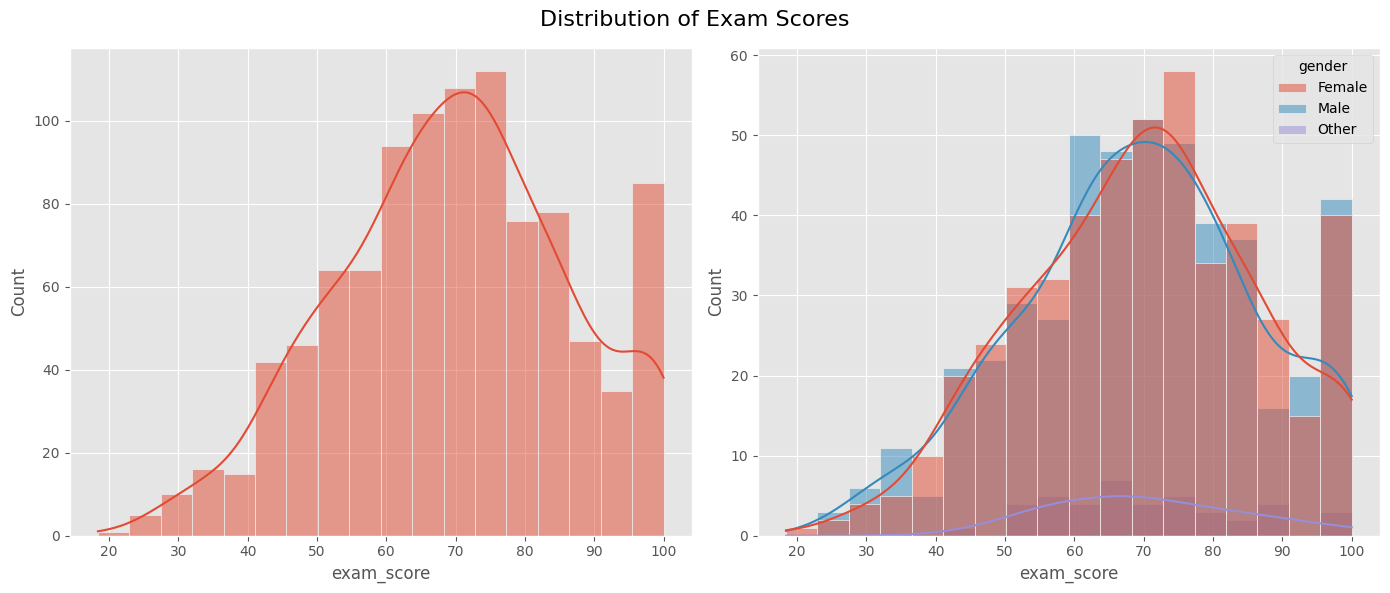

In [27]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Exam Scores', fontsize=16)
sns.histplot(data=df, x='exam_score', kde=True, ax=axes[0])
sns.histplot(data=df, x='exam_score', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

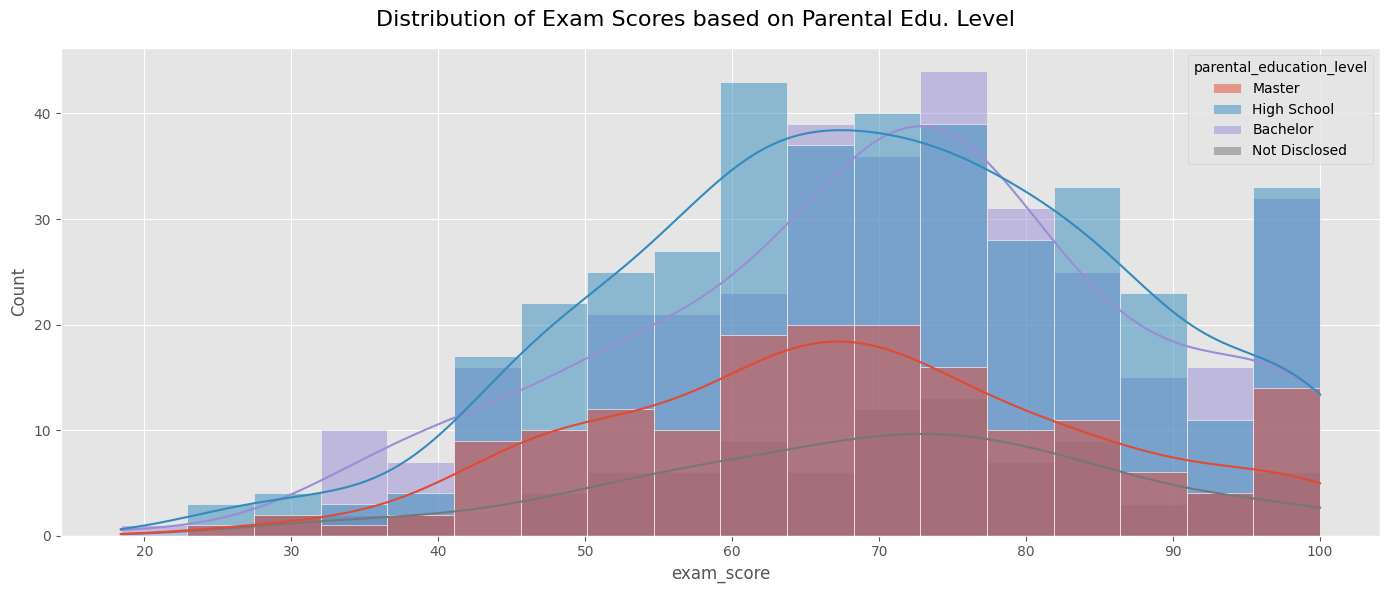

In [35]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Exam Scores based on Parental Edu. Level', fontsize=16)
sns.histplot(data=df, x='exam_score', hue='parental_education_level', kde=True)
plt.tight_layout()

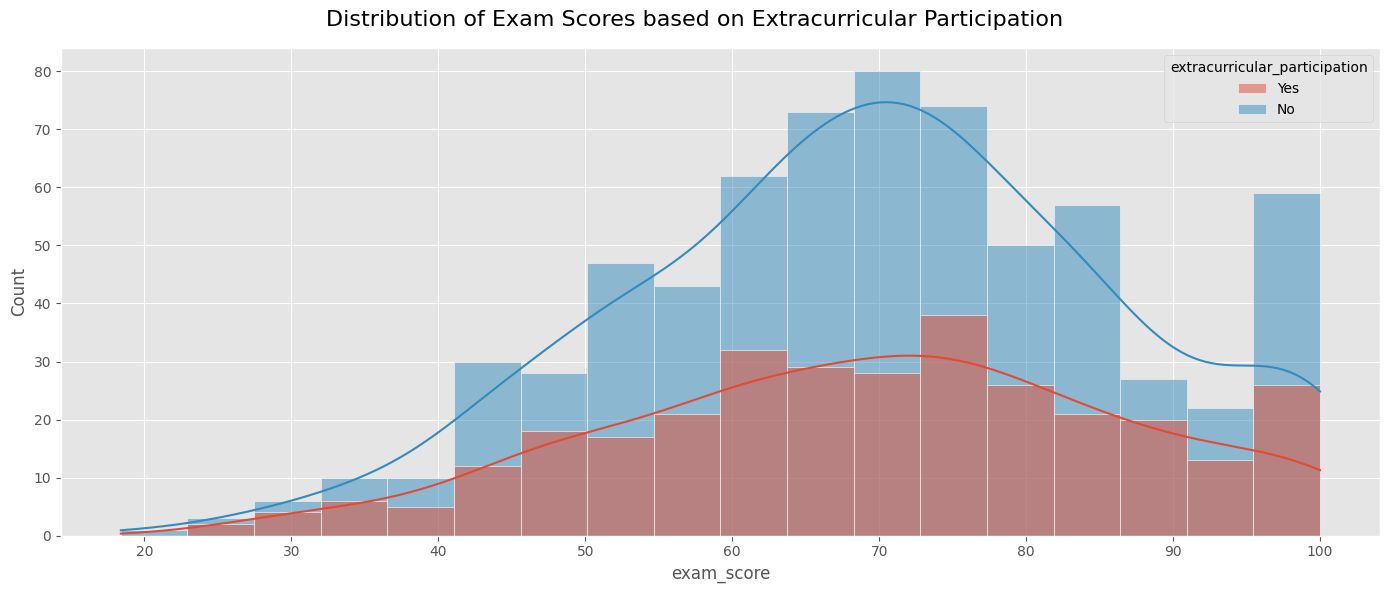

In [36]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Exam Scores based on Extracurricular Participation', fontsize=16)
sns.histplot(data=df, x='exam_score', hue='extracurricular_participation', kde=True)
plt.tight_layout()

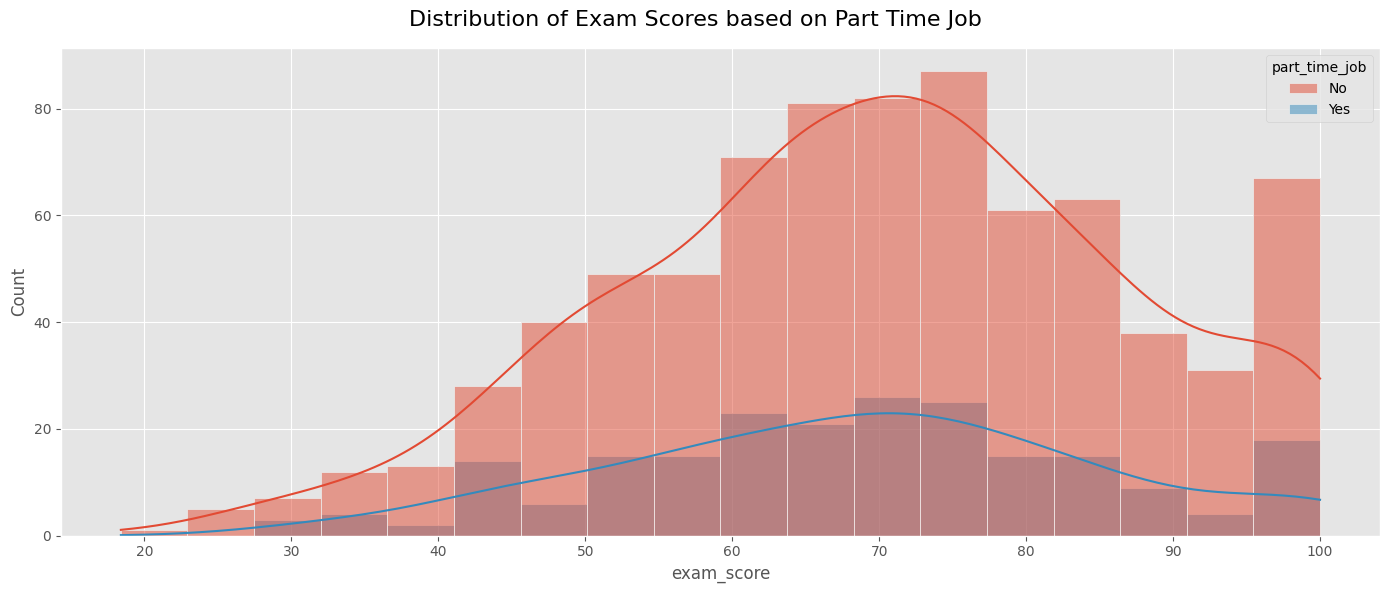

In [37]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Exam Scores based on Part Time Job', fontsize=16)
sns.histplot(data=df, x='exam_score', hue='part_time_job', kde=True)
plt.tight_layout()

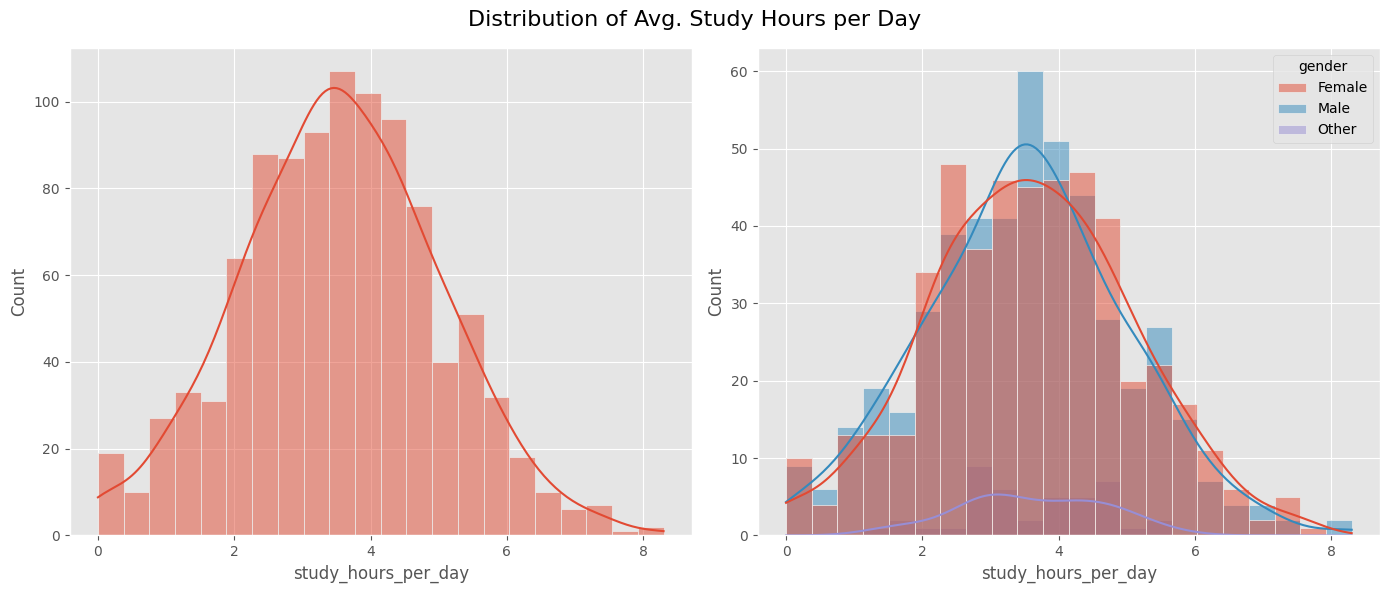

In [28]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Avg. Study Hours per Day', fontsize=16)
sns.histplot(data=df, x='study_hours_per_day', kde=True, ax=axes[0])
sns.histplot(data=df, x='study_hours_per_day', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

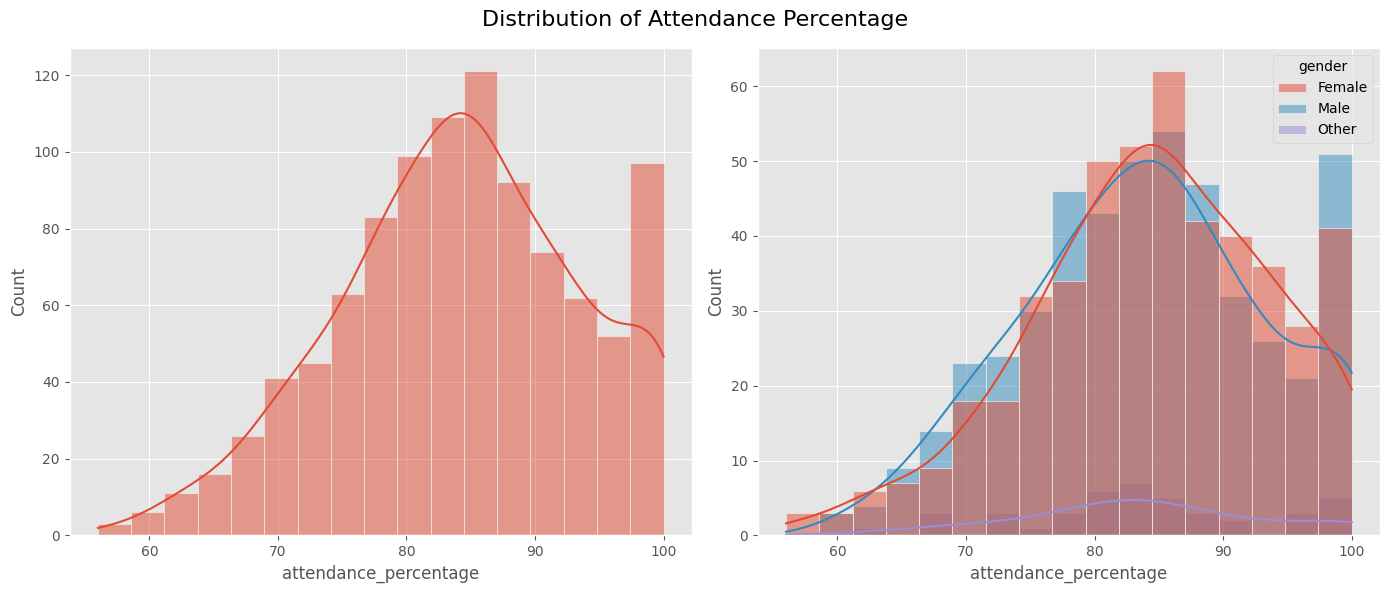

In [29]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Attendance Percentage', fontsize=16)
sns.histplot(data=df, x='attendance_percentage', kde=True, ax=axes[0])
sns.histplot(data=df, x='attendance_percentage', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

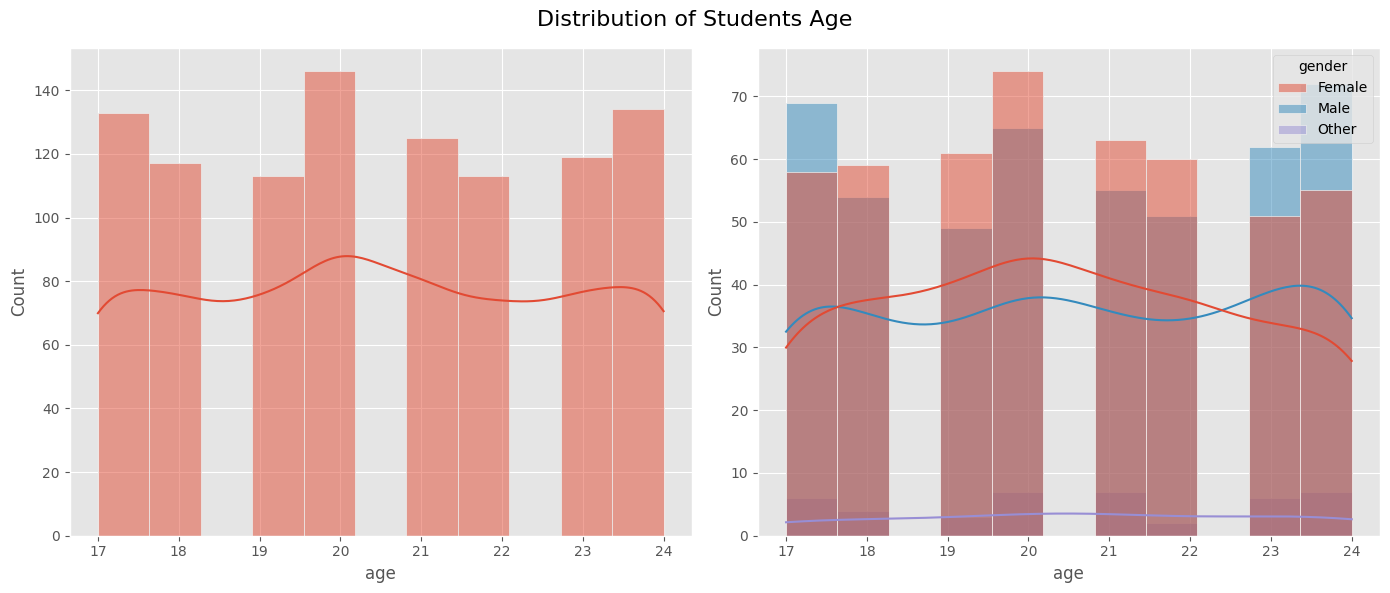

In [31]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt.suptitle('Distribution of Students Age', fontsize=16)
sns.histplot(data=df, x='age', kde=True, ax=axes[0])
sns.histplot(data=df, x='age', hue='gender', kde=True, ax=axes[1])
plt.tight_layout()

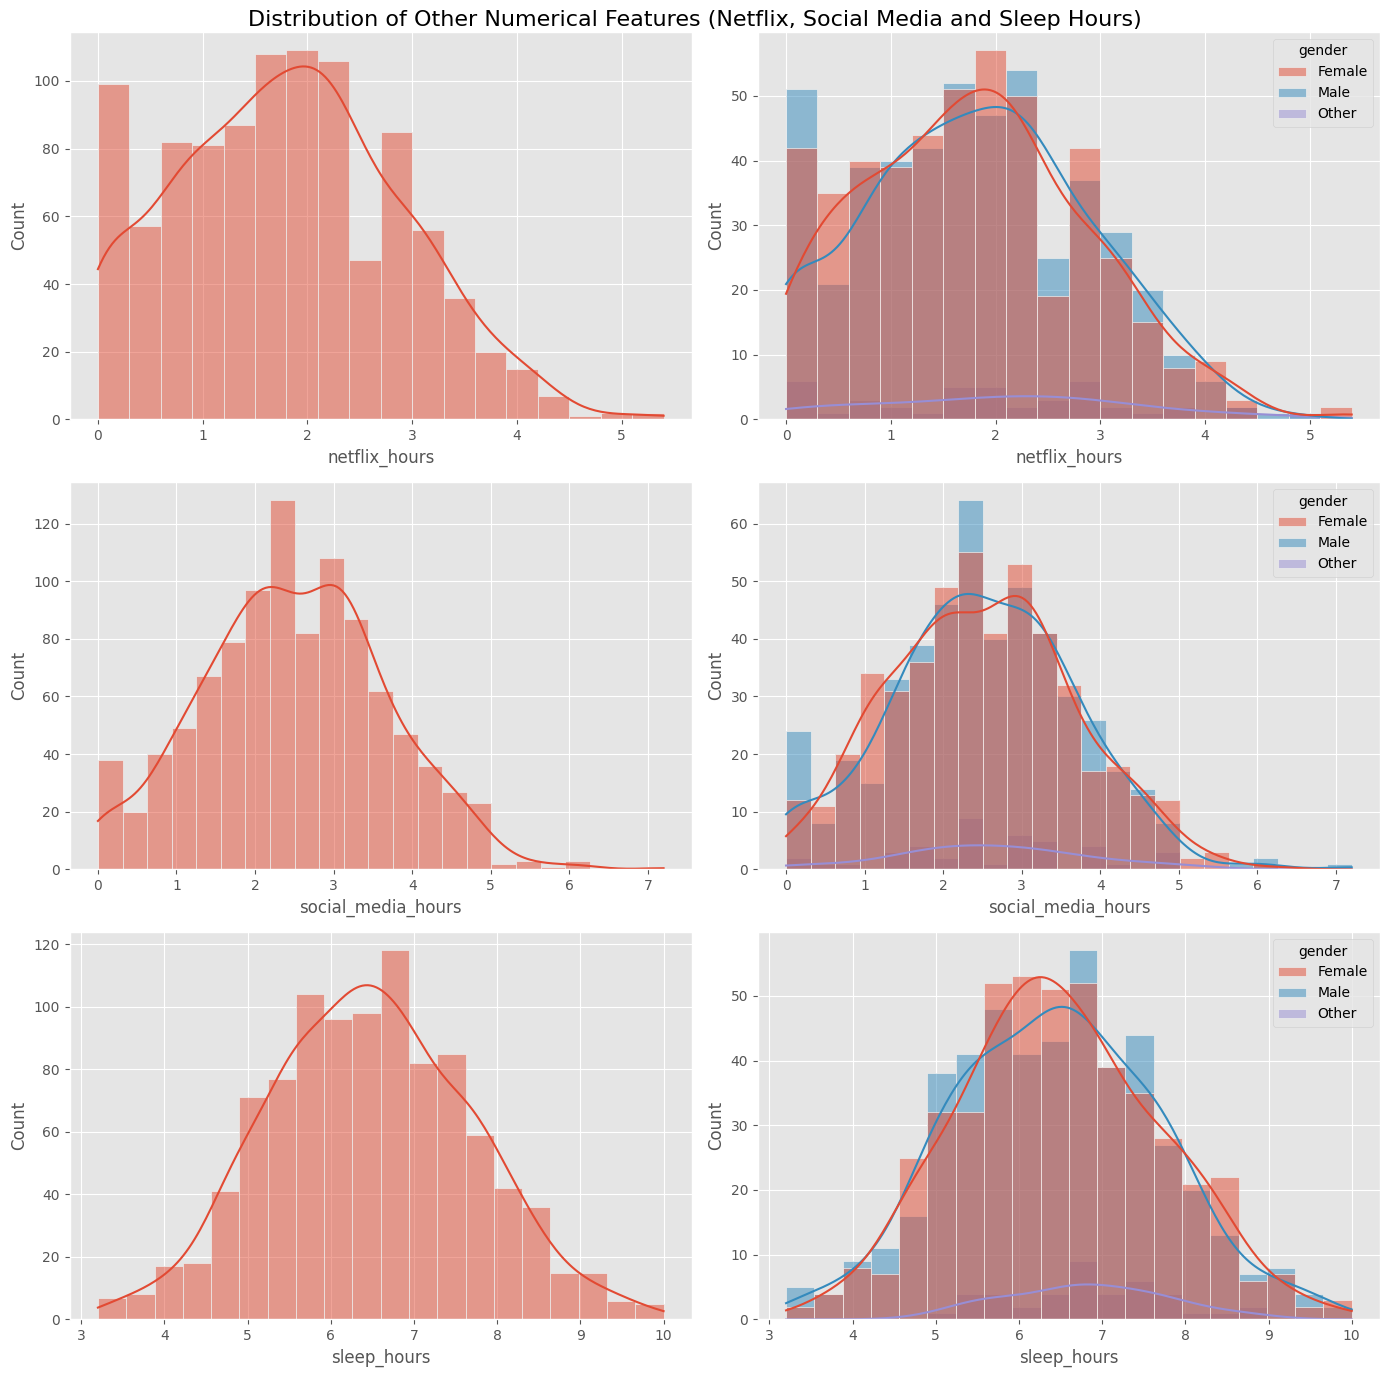

In [30]:
# Distribution of other numerical features like: 'netflix_hours', 'social_media_hours', 'sleep_hours'
fig, axes = plt.subplots(3,2, figsize=(14,14))
plt.suptitle('Distribution of Other Numerical Features (Netflix, Social Media and Sleep Hours)', fontsize=16)
sns.histplot(data=df, x='netflix_hours', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='netflix_hours', hue='gender', kde=True, ax=axes[0,1])

sns.histplot(data=df, x='social_media_hours', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='social_media_hours', hue='gender', kde=True, ax=axes[1,1])

sns.histplot(data=df, x='sleep_hours', kde=True, ax=axes[2,0])
sns.histplot(data=df, x='sleep_hours', hue='gender', kde=True, ax=axes[2,1])

plt.tight_layout()

#### (4.2) Countplot and Bar Charts

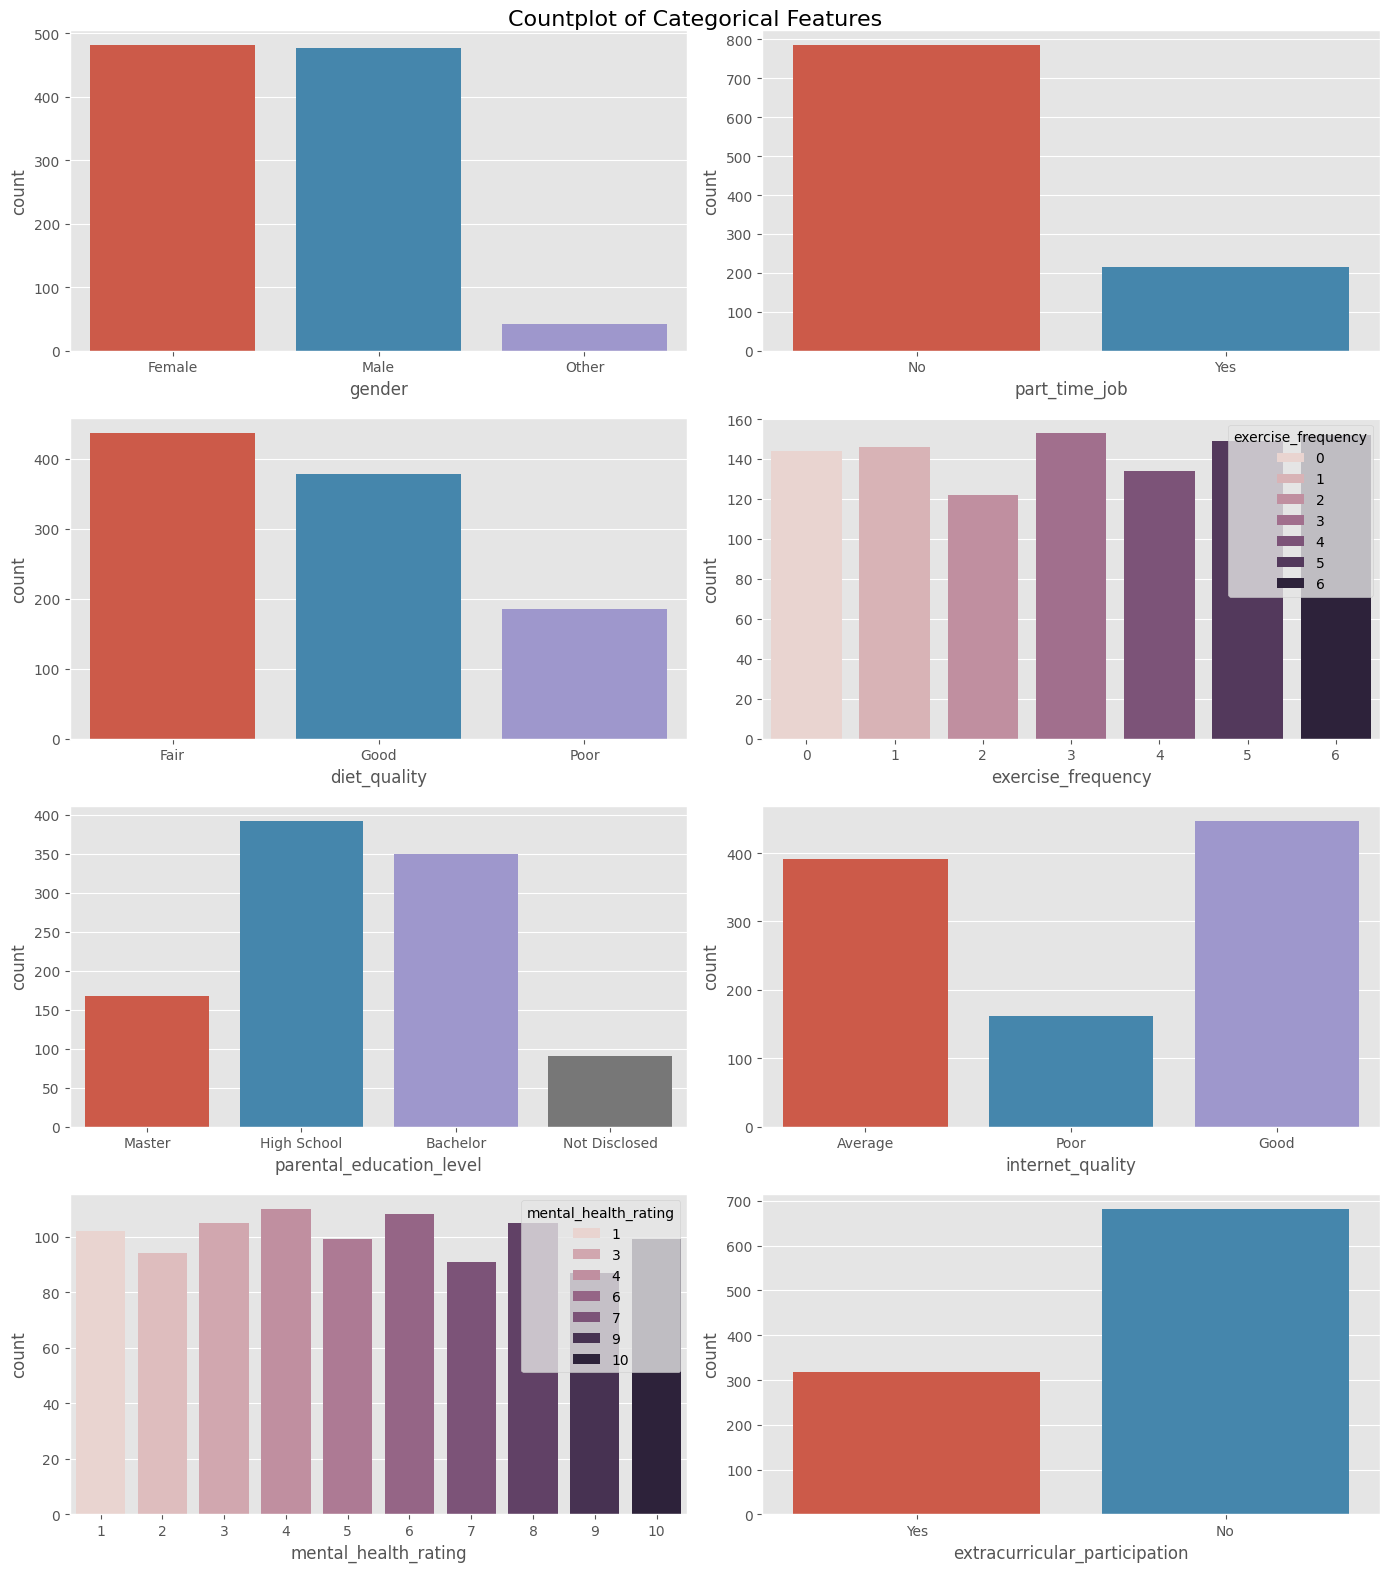

In [34]:
fig, ax = plt.subplots(4,2, figsize=(14, 16))
plt.suptitle('Countplot of Categorical Features', fontsize=16)

sns.countplot(data=df, x='gender', ax=ax[0,0], hue='gender')
sns.countplot(data=df, x='part_time_job', ax=ax[0,1], hue='part_time_job')
sns.countplot(data=df, x='diet_quality', ax=ax[1,0], hue='diet_quality')
sns.countplot(data=df, x='exercise_frequency', ax=ax[1,1], hue='exercise_frequency')
sns.countplot(data=df, x='parental_education_level', ax=ax[2,0], hue='parental_education_level')
sns.countplot(data=df, x='internet_quality', ax=ax[2,1], hue='internet_quality')
sns.countplot(data=df, x='mental_health_rating', ax=ax[3,0], hue='mental_health_rating')
sns.countplot(data=df, x='extracurricular_participation', ax=ax[3,1], hue='extracurricular_participation')

plt.tight_layout()